## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [2]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq
from sympy.calculus.util import continuous_domain
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание.
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

0

-3/2 + sqrt(17)/2

<ipython-input-3-e6a62561b6cd>:6: RuntimeWarning: invalid value encountered in log2
  return (x**2 + 3*x - 2) * np.log2(3*x+1)


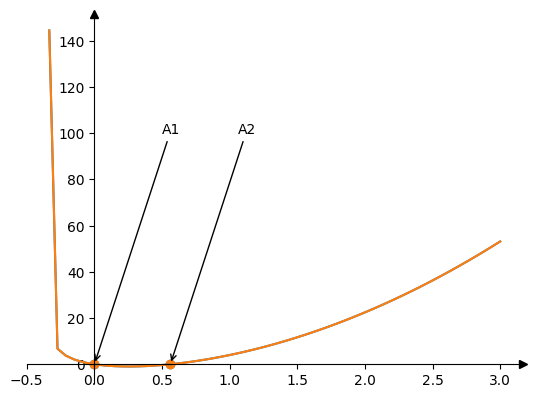

In [3]:
x = Symbol('x')
def f(x, lib='sympy'):
    if lib == 'sympy':
        return (x**2 + 3*x - 2) * sympy.log(3*x+1, 2)
    elif lib == 'numpy':
        return (x**2 + 3*x - 2) * np.log2(3*x+1)
    else:
        return 'Wrong library name, only sympy or numpy is allowed'

roots = solve(f(x))
roots.append(f(0))
roots = list({i for i in roots if 3*i + 1 > 0})
display(*roots)
y_coordinate = [0] * len(roots)

X = np.linspace(-3, 3, 100)
plt.plot(X, f(X, 'numpy'))
plt.scatter(roots, y_coordinate)
ax = plt.gca()

for i, x_coordinate in enumerate(roots):
    ax.annotate('A' + str(i + 1),
                xy=(x_coordinate, y_coordinate[i]), xycoords='data',
                xytext=(x_coordinate + 0.5, y_coordinate[i] + 100), textcoords='data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.plot(1, 0, '>k', transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, '^k', transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(X, f(X, 'numpy'))
ax.scatter(roots, y_coordinate)


### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

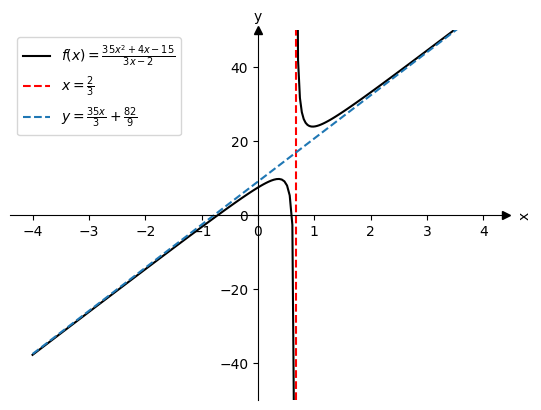

In [4]:
def f(x):
    return (35*x**2 + 4*x - 15)/(3*x - 2)

fnum, fdenom = sympy.fraction(f(x))
func_nonexist = sympy.solve(fdenom, x) # x = 2/3
vertical_as = sympy.limit(f(x), x, func_nonexist[0])

# x --> +oo
k_pos = sympy.limit(f(x)/x, x, +sympy.oo)
b_pos = sympy.limit(f(x) - k_pos*x, x, +sympy.oo)
inclined_assimptote1 = k_pos*x + b_pos

# x --> -oo
k_neg = sympy.limit(f(x)/x, x, -sympy.oo)
b_neg = sympy.limit(f(x) - k_neg*x, x, -sympy.oo)
inclined_assimptote2 = k_neg*x + b_neg

minY = -50
maxY = 50
ax = plt.gca()
ax.set(ylim=(minY, maxY))

# Грфаик функции.
X1 = np.linspace(-4, float(func_nonexist[0] - 0.01), 100)
X2 = np.linspace(float(func_nonexist[0] + 0.01), 4, 100)
ax.plot(X1, f(X1), 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')
ax.plot(X2, f(X2), 'k-')

# Веритикальная ассимптота.
if (vertical_as == sympy.oo):
  ax.axvline(x=func_nonexist, color='red', linestyle='--', label=r'$x=' + sympy.latex(*func_nonexist) + r'$')

# Наклонные ассимптоты.
if (k_pos == k_neg and b_pos == b_neg):
  ax.plot([X1[0], X2[-1]], [inclined_assimptote1.subs(x, X1[0]), inclined_assimptote1.subs(x, X2[-1])], '--',
         label=r'$y=' + sympy.latex(inclined_assimptote1) + r'$')
else:
  ax.plot([X1[0], X2[-1]], [inclined_assimptote1.subs(x, X1[0]), inclined_assimptote1.subs(x, X2[-1])], '--',
          label=r'$y=' + sympy.latex(inclined_assimptote1) + r'$')
  ax.plot([X1[0], X2[-1]], [inclined_assimptote2.subs(x, X1[0]), inclined_assimptote2.subs(x, X2[-1])], '--',
          label=r'$y=' + sympy.latex(inclined_assimptote2) + r'$')

ax.legend(loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.set_xlabel('y', labelpad = -165)
ax.set_ylabel('x', labelpad = -225)
ax.plot(1, 0, '>k', transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, '^k', transform=ax.get_xaxis_transform(), clip_on=False)

### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю.

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета.

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

Text(0, 0.5, 'y')

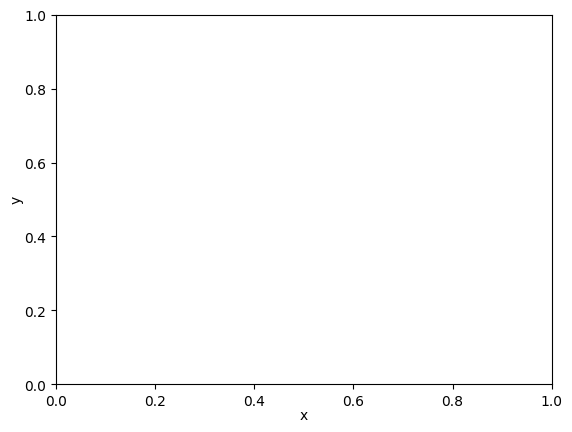

In [24]:
t = Symbol('t')

def f(t, v = 0, a = np.pi/2):
  x = v * t * np.cos(a)
  y = v * t * np.sin(a) - 10*t**2/2
  return (x, y)

values = [[1, np.pi/6, 'green'], [2, np.pi/4, 'red'], [2, 1, 'black']]
ax = plt.gca()
ax.set_xlabel('x', labelpad = 0)
ax.set_ylabel('y', labelpad = 0)

# Не получается(((

### Индивидуальное задание.
Построить в одной координатной плоскости графики функций.

Вариант $121$


Построить в одной координатной плоскости графики функций $$f(x) = e^{x} - \frac{\sin{\left(2 x \right)}}{3}$$ $$g(x) = \frac{3 e^{x} \cos{\left(3 x \right)}}{4}$$ на отрезке $\left[- \frac{4}{3}, \  \frac{8}{3}\right]$, $f(x)$ синяя сплошная линия, $g(x)$ черная линия из точек. Отметки на горизонтальной оси от $- \frac{4}{3}$ до $\frac{8}{3}$ с шагом $2$, отметки подписать формулами как в Примере 3. По вертикальной оси отметки $2$, $9$, $10$, $11$, $12$.

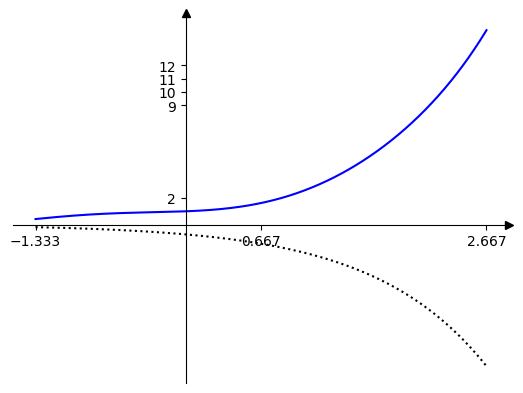

In [16]:
def f(A):
  return [np.e**x - np.sin(2*x)/3 for x in A]

def g(A):
  return [3*np.e**x*np.cos(3)/4 for x in A]

ax = plt.gca()
X = np.linspace(-4/3, 8/3, 1000)
ax.plot(X, f(X), color='blue')
ax.plot(X, g(X), color='black', linestyle='dotted')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xticks([-4/3 + 2*i for i in range(3)])
ax.set_yticks([2, 9, 10, 11, 12])